# Линейные модели

Фермер хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма». Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. 

**Цель:** Создать две модели, одна из которых будет прогнозировать возможный удой коровы, а другая рассчитывать вероятность получить вкусное молоко.

**Задачи:** Провести предобработу данныъ, проанализировать все признаки, провести корреляционный анализ, построить модели линейной и логистической регрессии, предсказать удой и вкус молока коров с ЭкоФермы.

**Описание данных:**

Даны три датасета.
1. `ferma_main.csv` - данные о стаде фермера на текущий момент.

    - `id` — уникальный идентификатор коровы.
    - `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
    - `ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.
    - `Сырой протеин, г` — содержание сырого протеина в корме (в граммах).
    - `СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.
    - `Порода` — порода коровы.
    - `Тип пастбища` — ландшафт лугов, на которых паслась корова.
    - `порода папы_быка` — порода папы коровы.
    - `Жирность,%` — содержание жиров в молоке (в процентах).
    - `Белок,%` — содержание белков в молоке (в процентах).
    - `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
    - `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).


2. `ferma_dad.csv` - имя папы каждой коровы в стаде фермера.

    - `id` — уникальный идентификатор коровы.
    - `Имя Папы` — имя папы коровы.
    
    
3. `cow_buy.csv` -  данные о коровах «ЭкоФермы».

    - `Порода` — порода коровы.
    - `Тип пастбища` — ландшафт лугов, на которых паслась корова.
    - `порода папы_быка` — порода папы коровы.
    - `Имя_папы` — имя папы коровы.
    - `Текущая_жирность,%` — содержание жиров в молоке (в процентах).
    - `Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).
    - `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
    
**План работы:**
1. [Загрузка данных](#par1)
2. [Предобработка данных](#par2)
3. [Исследовательсктй анализ данных](#par3)
4. [Корреляционный анализ](#par4)
5. [Обучение модели линейной регрессии](#par5)
6. [Обучение модели логистической регрессии](#par6)
7. [Итоговые выводы](#par7)

In [1]:
!pip install phik -q

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import phik
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_error,
                             accuracy_score,
                             confusion_matrix,
                             recall_score,precision_score)
import scipy.stats as st

<a id='par1'></a> 
## Загрузка данных 

In [3]:
ferma_main = pd.read_csv('C:/FATHER/datasets/ferma_main.csv',sep=';')
ferma_dad = pd.read_csv('C:/FATHER/datasets/ferma_dad.csv',sep=';')
cow_buy = pd.read_csv('C:/FATHER/datasets/cow_buy.csv',sep=';')

In [4]:
def description(df):
    display(df.head())
    df.info()

Рассмотрим данные в первом датасете.

In [5]:
description(ferma_main)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

Переименуем столбцы.

In [6]:
ferma_main.columns=['id','milk_yield_kg','EFU','crude_protein_g', 'SPR',
                    'breed','pasture_type','breed_dad_bull','fat_content_per','protein_per','milk_taste','age']
ferma_main.columns

Index(['id', 'milk_yield_kg', 'EFU', 'crude_protein_g', 'SPR', 'breed',
       'pasture_type', 'breed_dad_bull', 'fat_content_per', 'protein_per',
       'milk_taste', 'age'],
      dtype='object')

Проверим, что в столбцах `milk_taste` и `age` содержатся бинарные признаки.

In [7]:
print(ferma_main['milk_taste'].unique(),'\n',ferma_main['age'].unique())

['вкусно' 'не вкусно'] 
 ['более_2_лет' 'менее_2_лет']


Рассмотрим данные во втором датасете.

In [8]:
description(ferma_dad)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


Переименуем столбец "Имя Папы"

In [9]:
ferma_dad = ferma_dad.rename(columns={'Имя Папы':'dad_name'})
ferma_dad.columns

Index(['id', 'dad_name'], dtype='object')

Рассмотрим данные в третьем датасете.

In [10]:
description(cow_buy)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


Переименуем столбцы.

In [11]:
cow_buy.columns=['breed','pasture_type','breed_dad_bull','dad_name','cur_fat_content_per','cur_protein_per','age']
cow_buy.columns

Index(['breed', 'pasture_type', 'breed_dad_bull', 'dad_name',
       'cur_fat_content_per', 'cur_protein_per', 'age'],
      dtype='object')

Проверим что `age` - бинарный признак.

In [12]:
cow_buy['age'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

**Вывод:**
1. В данных отсутствуют пропуски.
2. Данные соответствуют описанию.

<a id='par2'></a> 
## Предобработка данных

### Поиск дубликтов

Проверим нет ли похожих значений в столбцах `breed`,`pasture_type`,`breed_dad_bull` датафреймов `ferma_main` и `cow_buy`. Если есть, заменим их.

In [13]:
print(ferma_main['breed'].unique())
print(cow_buy['breed'].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг']
['Вис Бик Айдиал' 'РефлешнСоверинг']


In [14]:
print(ferma_main['breed_dad_bull'].unique())
print(cow_buy['breed_dad_bull'].unique())

['Айдиал' 'Соверин' 'Айдиалл']
['Айдиал' 'Соверин']


Заменим "Айдиалл" на "Айдиал" в данных `ferma_main`.

In [15]:
ferma_main['breed_dad_bull'] = ferma_main['breed_dad_bull'].replace('Айдиалл', 'Айдиал', regex=True)
ferma_main['breed_dad_bull'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [16]:
print(ferma_main['pasture_type'].unique())
print(cow_buy['pasture_type'].unique())

['Равнинное' 'Равнинные' 'Холмистое']
['холмистое' 'равнинное']


Значения "Равнинное" и "Равнинные" имеют одинаковое значение.

In [17]:
ferma_main['pasture_type'] = ferma_main['pasture_type'].replace('Равнинные', 'Равнинное', regex=True)
ferma_main['pasture_type'].unique()

array(['Равнинное', 'Холмистое'], dtype=object)

Чтобы при работе с двумя датасетами не возникло проблем, сделаем данные в `cow_buy['pasture_type']` такими же как в `ferma_main['pasture_type']`.

In [18]:
cow_buy['pasture_type'] = cow_buy['pasture_type'].str.title()
print(cow_buy['pasture_type'].unique())

['Холмистое' 'Равнинное']


Проверим нет ли ошибок в `ferma_dad`.

In [19]:
print(ferma_dad['dad_name'].unique())

['Буйный' 'Соловчик' 'Барин' 'Геркулес']


Теперь проверим наличие явных дубликатов во всех трех датасетах. Удалим дубликаты в датасете `ferma_main`.

In [20]:
print('ferma_main')
print('Количество явных дубликатов до обработки:',ferma_main.duplicated().sum())
ferma_main = ferma_main.drop_duplicates().reset_index(drop=True)
print('Количество явных дубликатов после обработки:',ferma_main.duplicated().sum())

ferma_main
Количество явных дубликатов до обработки: 5
Количество явных дубликатов после обработки: 0


In [21]:
print('ferma_dad')
print('Количество явных дубликатов до обработки:',ferma_dad.duplicated().sum())

ferma_dad
Количество явных дубликатов до обработки: 0


In [22]:
print('cow_buy')
print('Количество явных дубликатов до обработки:',cow_buy.duplicated().sum())

cow_buy
Количество явных дубликатов до обработки: 4


Не будем удалять дубликаты в `cow_buy`, возможно, коровы имели одинаковые характеристики. Так как данных очень мало, удаление 4 элементов может сильно повлиять на конечный вывод.

### Изменение типов данных

Проверим типы данных всех столбцов и изменим их, где необходимо.

In [23]:
ferma_main.dtypes

id                  int64
milk_yield_kg       int64
EFU                object
crude_protein_g     int64
SPR                object
breed              object
pasture_type       object
breed_dad_bull     object
fat_content_per    object
protein_per        object
milk_taste         object
age                object
dtype: object

В столбцах `EFU`, `SPR`, `fat_content_per`, `protein_per` записаны числовые данные, но их тип данных `object`. Поменяем тип данных, перед этим заменив все запятые в значениях на точки.    

In [24]:
col = ['EFU', 'SPR', 'fat_content_per', 'protein_per']
for c in col:
    ferma_main[c] = ferma_main[c].str.replace(',','.')
    ferma_main = ferma_main.astype({c: 'float64'} )

In [25]:
ferma_main.dtypes

id                   int64
milk_yield_kg        int64
EFU                float64
crude_protein_g      int64
SPR                float64
breed               object
pasture_type        object
breed_dad_bull      object
fat_content_per    float64
protein_per        float64
milk_taste          object
age                 object
dtype: object

In [26]:
ferma_dad.dtypes

id           int64
dad_name    object
dtype: object

In [27]:
cow_buy.dtypes

breed                  object
pasture_type           object
breed_dad_bull         object
dad_name               object
cur_fat_content_per    object
cur_protein_per        object
age                    object
dtype: object

В столбцах `cur_fat_content_per`, `cur_protein_per` числовые данные записаны через запятую. Запишем их через точку и поменяет тип данных.

In [28]:
col = ['cur_fat_content_per', 'cur_protein_per']

for c in col:
    cow_buy[c] = cow_buy[c].str.replace(',','.')
    cow_buy = cow_buy.astype({c: 'float64'} )

In [29]:
cow_buy.dtypes

breed                   object
pasture_type            object
breed_dad_bull          object
dad_name                object
cur_fat_content_per    float64
cur_protein_per        float64
age                     object
dtype: object

### Вывод

1. Мы исправили значения в некоторых столбцах данных (удалили одинаковые, привели к одному виду) и удалили явные дубликаты, где это было нужно.
2. Изменили тип данных в столбцах с числовыми значениеми со строкового на float.

<a id='par3'></a> 
## Исследовательский анализ данных

Проанализируем все признаки в датасетах `ferma_main` и `cow_buy`.

### Удой

Построим "ящик с усами" и посмотрим, есть ли выбросы.

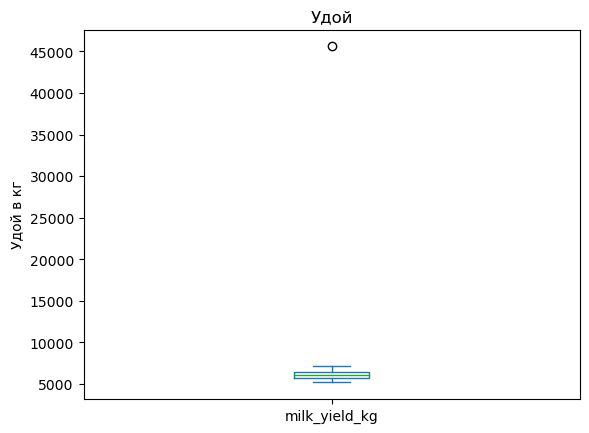

In [30]:
ferma_main['milk_yield_kg'].plot(kind='box')
plt.title('Удой')
plt.ylabel('Удой в кг')
plt.show()

В данных есть одна корова, удой которой больше 45000 кг. Это явная ошибка, удалим эту строчку.

In [31]:
ferma_main = ferma_main[ferma_main['milk_yield_kg'] < 45000]

Построим распределение и найдем среднюю массу удоя, минимвльное и максимальные значения.

Средний удой 6125.97 
Минимальный удой 5204 
Максимальный удой 7222


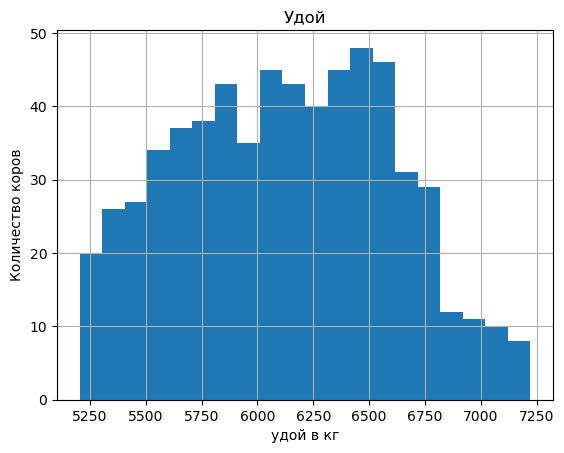

In [32]:
ferma_main['milk_yield_kg'].hist(bins=20)
plt.title('Удой')
plt.xlabel('удой в кг')
plt.ylabel('Количество коров');
print('Средний удой', round(ferma_main['milk_yield_kg'].mean(),2),
      '\nМинимальный удой',ferma_main['milk_yield_kg'].min(),
     '\nМаксимальный удой',ferma_main['milk_yield_kg'].max())

Коровы фермера дают в среднем 6125 кг молока в год. Большинство коров приносят от 5204 кг до 6750. Некоторые коровы давали до 7222 кг молока.

### Энергитическая кормовая единица


Проанализируем характеристики корма. Посмотри если ли выбросы в ЭКЕ, где находятся среднее, максимальное и минимальное значения.

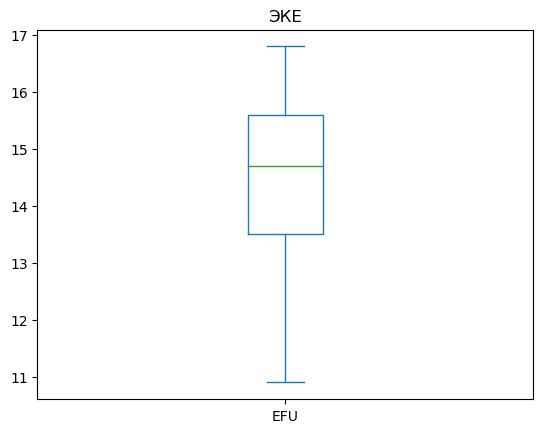

Среднее значение ЭКЕ: 14.55 
Минимальное значение ЭКЕ: 10.9 
Максимальное значение ЭКЕ: 16.8


In [33]:
ferma_main['EFU'].plot(kind='box')
plt.title('ЭКЕ')
plt.show()

print('Среднее значение ЭКЕ:', round(ferma_main['EFU'].mean(),2),
      '\nМинимальное значение ЭКЕ:',ferma_main['EFU'].min(),
     '\nМаксимальное значение ЭКЕ:',ferma_main['EFU'].max())

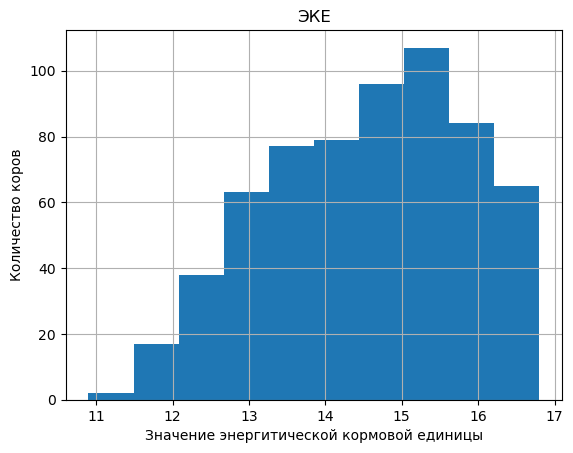

In [34]:
ferma_main['EFU'].hist()
plt.title('ЭКЕ')
plt.xlabel('Значение энергитической кормовой единицы')
plt.ylabel('Количество коров')
plt.show()

В данных по этому признаку выбросов нет. Значения варьируются от 10,9 до 16,8.

### Сырой протеин

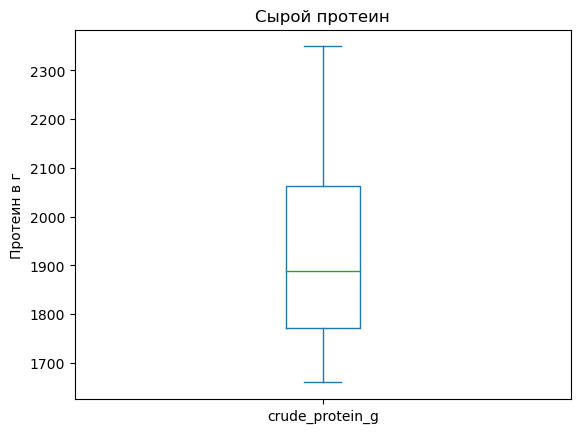

Среднее значение сырого протеина: 1923.76 
Минимальное значение сырого протеина: 1660 
Максимальное значение сырого протеина: 2349


In [35]:
ferma_main['crude_protein_g'].plot(kind='box')
plt.title('Сырой протеин')
plt.ylabel('Протеин в г')
plt.show()

print('Среднее значение сырого протеина:', round(ferma_main['crude_protein_g'].mean(),2),
      '\nМинимальное значение сырого протеина:',ferma_main['crude_protein_g'].min(),
     '\nМаксимальное значение сырого протеина:',ferma_main['crude_protein_g'].max())

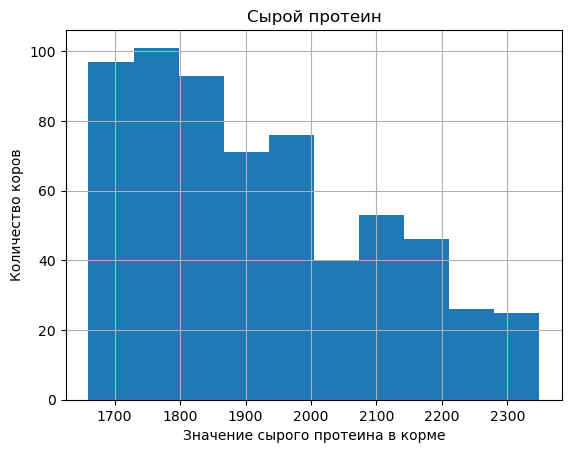

In [36]:
ferma_main['crude_protein_g'].hist()
plt.title('Сырой протеин')
plt.xlabel('Значение сырого протеина в корме')
plt.ylabel('Количество коров')
plt.show()

В среднем в корме содержится 1924 г сырого протеина.

### Сахаро-протеиновое соотношение

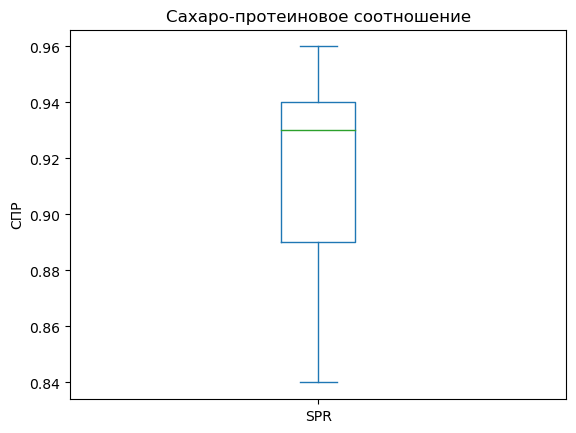

Среднее значение СПР: 0.91 
Минимальное значение СПР: 0.84 
Максимальное значение СПР: 0.96


In [37]:
ferma_main['SPR'].plot(kind='box')
plt.title('Сахаро-протеиновое соотношение')
plt.ylabel('СПР')
plt.show()

print('Среднее значение СПР:', round(ferma_main['SPR'].mean(),2),
      '\nМинимальное значение СПР:',ferma_main['SPR'].min(),
     '\nМаксимальное значение СПР:',ferma_main['SPR'].max())

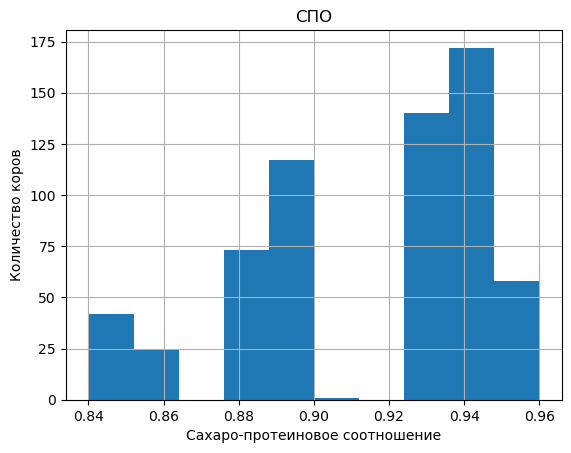

In [38]:
ferma_main['SPR'].hist()
plt.title('СПО')
plt.xlabel('Сахаро-протеиновое соотношение')
plt.ylabel('Количество коров')
plt.show()

Медианное значение СПР больше среднего. Можно сказать, что чаще всего количество сахара в корме почти равно количеству протеина.
На графике видны несколько групп значений. Далее этот признак можно будет перевести в категориальный.

### Порода

Посмотрим на распределение коров по породам в двух датасетах.

In [39]:
br1 = ferma_main.pivot_table(index='breed',values='id',aggfunc='count')
br1.columns = ['count']
br1

,count
breed,
Вис Бик Айдиал,372
РефлешнСоверинг,256


In [40]:
br2 = cow_buy.pivot_table(index='breed',values='age',aggfunc='count')
br2.columns = ['count']
br2

,count
breed,
Вис Бик Айдиал,9
РефлешнСоверинг,11


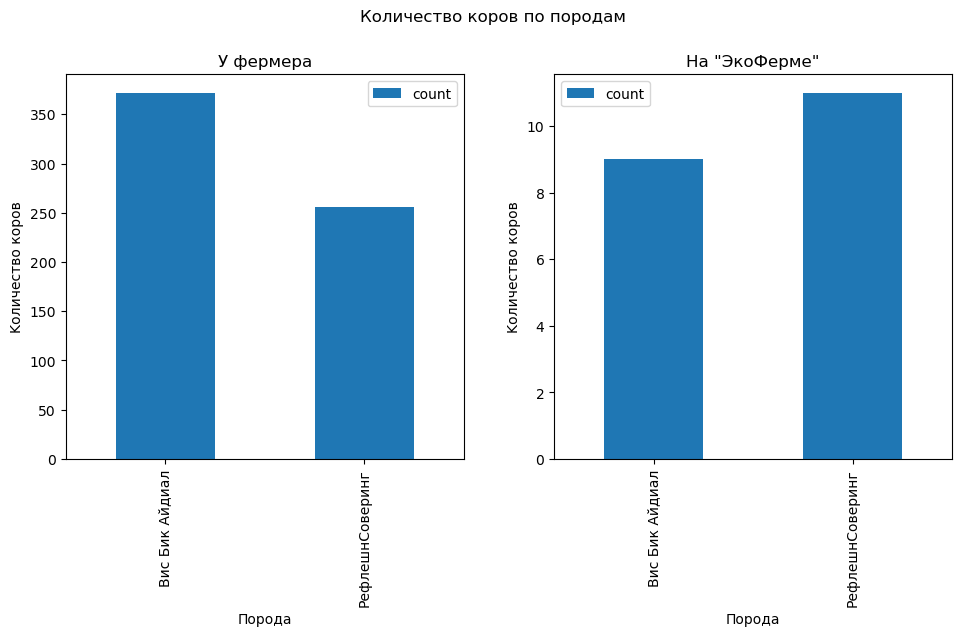

In [41]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2 )
fig. tight_layout ()
fig.set_size_inches(10, 5)

br1.plot(kind='bar',ax=axs[0])
axs[0].set_title('У фермера')

br2.plot(kind='bar',ax=axs[1])
axs[1].set_title('На "ЭкоФерме"')

for i in [0,1]:
    axs[i].set_xlabel('Порода')
    axs[i].set_ylabel('Kоличество коров')
    
fig.suptitle('Количество коров по породам')
plt.subplots_adjust(top= 0.85 )
plt.show()

### Тип пастбища

Посмотрим на распределение коров по пастбищам в двух датасетах.

In [42]:
pt1 = ferma_main.pivot_table(index='pasture_type',values='id',aggfunc='count')
pt1.columns = ['count']
pt1

,count
pasture_type,
Равнинное,278
Холмистое,350


In [43]:
pt2 = cow_buy.pivot_table(index='pasture_type',values='age',aggfunc='count')
pt2.columns = ['count']
pt2

,count
pasture_type,
Равнинное,11
Холмистое,9


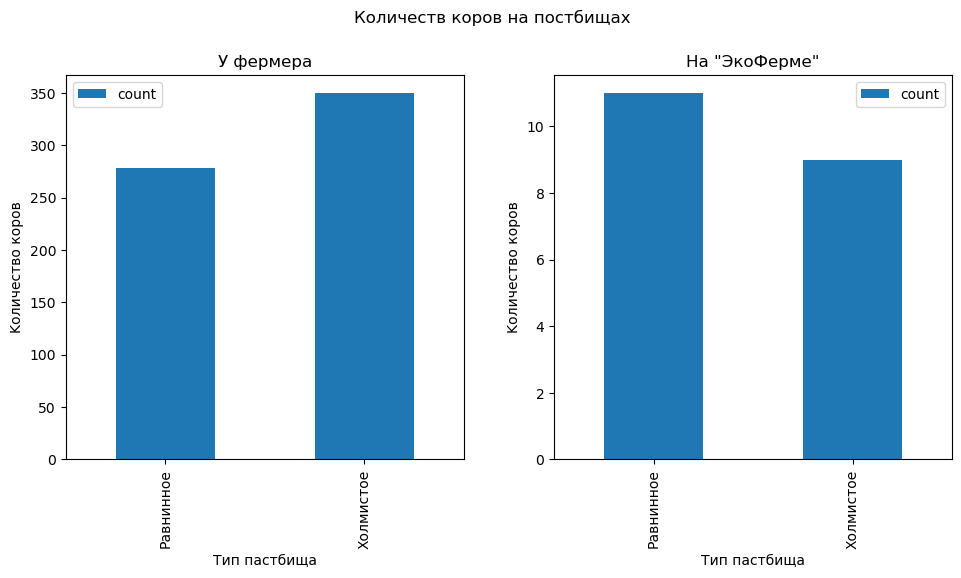

In [44]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2 )
fig. tight_layout ()
fig.set_size_inches(10, 5)

pt1.plot(kind='bar',ax=axs[0])
axs[0].set_title('У фермера')

pt2.plot(kind='bar',ax=axs[1])
axs[1].set_title('На "ЭкоФерме"')

for i in [0,1]:
    axs[i].set_xlabel('Тип пастбища')
    axs[i].set_ylabel('Kоличество коров')
    
fig.suptitle('Количеств коров на постбищах')
plt.subplots_adjust(top= 0.85 )
plt.show()

### Порода папы быка

Посмотрим на распределение коров по породам папы-быка в двух датасетах.

In [45]:
bdb1 = ferma_main.pivot_table(index='breed_dad_bull',values='id',aggfunc='count')
bdb1.columns = ['count']
bdb1

,count
breed_dad_bull,
Айдиал,317
Соверин,311


In [46]:
bdb2 = cow_buy.pivot_table(index='breed_dad_bull',values='age',aggfunc='count')
bdb2.columns = ['count']
bdb2

,count
breed_dad_bull,
Айдиал,8
Соверин,12


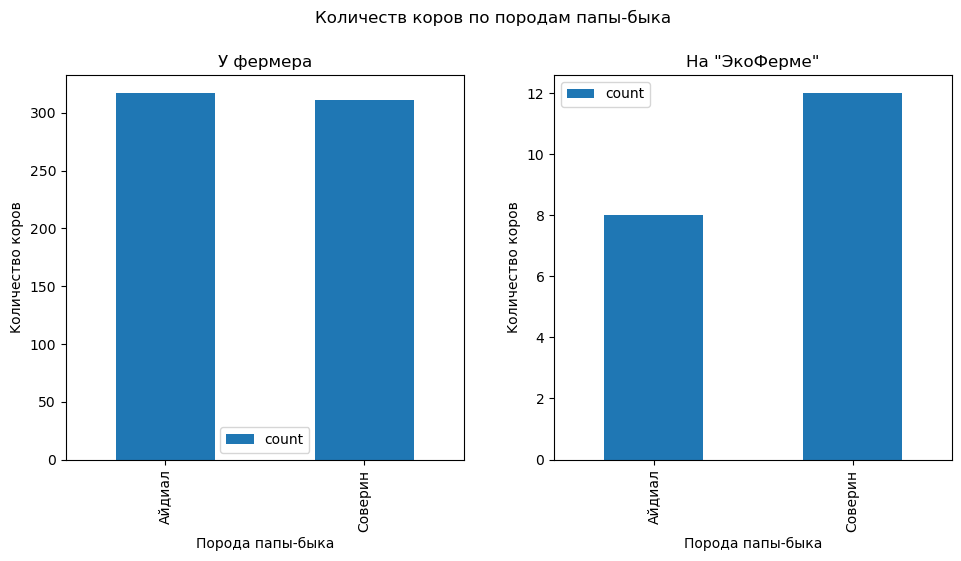

In [47]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2 )
fig. tight_layout ()
fig.set_size_inches(10, 5)

bdb1.plot(kind='bar',ax=axs[0])
axs[0].set_title('У фермера')

bdb2.plot(kind='bar',ax=axs[1])
axs[1].set_title('На "ЭкоФерме"')

for i in [0,1]:
    axs[i].set_xlabel('Порода папы-быка')
    axs[i].set_ylabel('Kоличество коров')
    
fig.suptitle('Количеств коров по породам папы-быка')
plt.subplots_adjust(top= 0.85 )
plt.show()

### Имя папы-быка

Коровы с одинаковыми именами могут быть разных пород, а значит это разные коровы. Для верного анализа добавим в `ferma_main` столбец с именами пап-быков.

In [48]:
ferma_main.shape

(628, 12)

In [49]:
ferma_main_dad = ferma_main.merge(ferma_dad, how='left',on='id')
ferma_main_dad.shape

(628, 13)

Посчитаем сколько детей было у быков.

In [50]:
nd1 = ferma_main_dad.pivot_table(index=['dad_name','breed_dad_bull'],values='id',aggfunc='count')
nd1.columns = ['count']
nd1

count
dad_name breed_dad_bull       
Барин    Айдиал             28
         Соверин           212
Буйный   Айдиал            214
Геркулес Айдиал             64
Соловчик Айдиал             11
         Соверин            99

In [51]:
nd2 = cow_buy.pivot_table(index=['dad_name','breed_dad_bull'],values='breed',aggfunc='count')
nd2.columns = ['count']
nd2

count
dad_name breed_dad_bull       
Барин    Соверин             4
Буйный   Айдиал              5
         Соверин             3
Геркулес Айдиал              3
         Соверин             3
Соловчик Соверин             2

Может быть так, что некоторых быков зовут одинаково. Поэтому сделать однозначные выводы по этим данным не получится. Возможно, Барин и Буйный очень популярное имя для быков, или некоторые быки действительно имеют потомство в 200 коров.

### Жирность

Посмотрим, есть ли выбросы в данных про жирность молока.

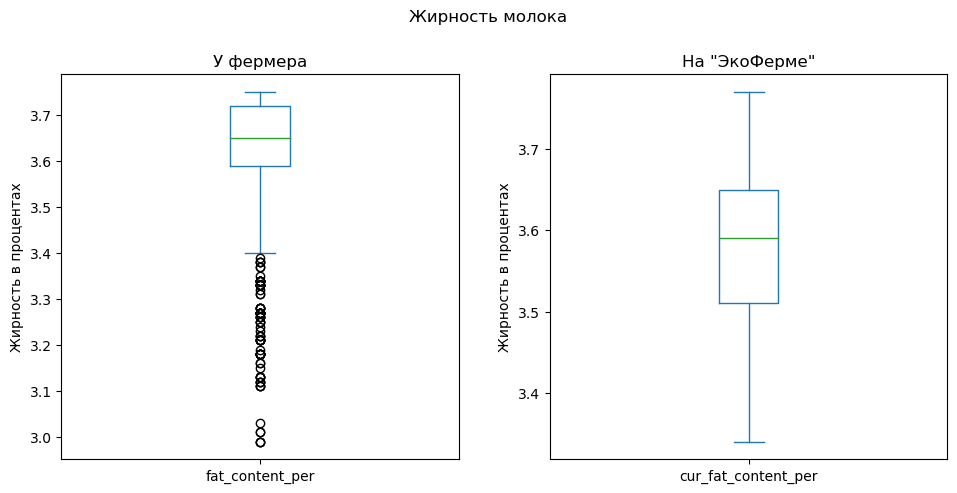

In [52]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2 )
fig. tight_layout ()
fig.set_size_inches(10, 5)

ferma_main['fat_content_per'].plot(kind='box', ax=axs[0])
axs[0].set_title('У фермера')
axs[0].set_ylabel('Жирность в процентах')

cow_buy['cur_fat_content_per'].plot(kind='box', ax=axs[1])
axs[1].set_title('На "ЭкоФерме"')
axs[1].set_ylabel('Жирность в процентах')

fig.suptitle('Жирность молока')
plt.subplots_adjust(top= 0.85 )
plt.show()

Алгоритм считает значения, меньшие 3,4 , выбросами. Однако жирность молока может доходить и до 3%, поэтому оставим данные с выбросами. Они не противоречат действительности.

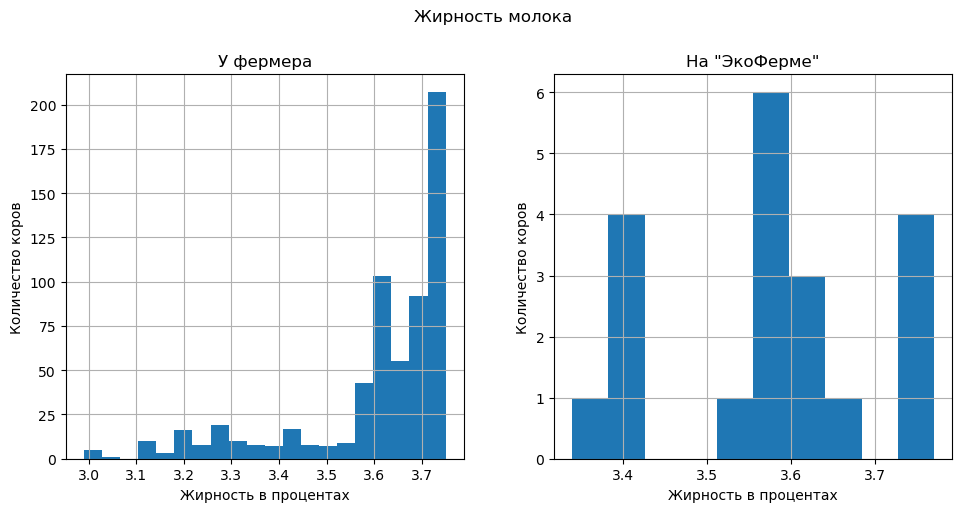

In [53]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2 )
fig. tight_layout ()
fig.set_size_inches(10, 5)

ferma_main['fat_content_per'].hist(bins=20, ax=axs[0])
axs[0].set_title('У фермера')
axs[0].set_xlabel('Жирность в процентах')
axs[0].set_ylabel('Количество коров')

cow_buy['cur_fat_content_per'].hist(bins=10, ax=axs[1])
axs[1].set_title('На "ЭкоФерме"')
axs[1].set_xlabel('Жирность в процентах')
axs[1].set_ylabel('Количество коров')

fig.suptitle('Жирность молока')
plt.subplots_adjust(top= 0.85 )
plt.show()
plt.show()

Данных с ЭкоФермы очень мало, поэтому график имеет пробелы, но все значения в пределах нормы. График на первом датасете напоминает распределение Пуассона и имеет максимум в значении жирности примерно 3,75%.

### Белок

Посмотрим, есть ли выбросы в данных про содержание белка в молоке.

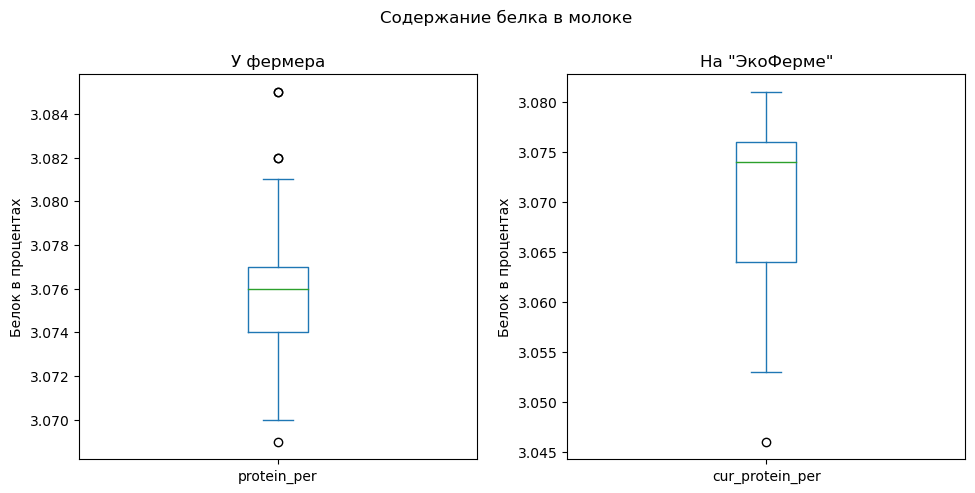

In [54]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2 )
fig. tight_layout ()
fig.set_size_inches(10, 5)

ferma_main['protein_per'].plot(kind='box', ax=axs[0])
axs[0].set_title('У фермера')
axs[0].set_ylabel('Белок в процентах')

cow_buy['cur_protein_per'].plot(kind='box', ax=axs[1])
axs[1].set_title('На "ЭкоФерме"')
axs[1].set_ylabel('Белок в процентах')

fig.suptitle('Содержание белка в молоке')
plt.subplots_adjust(top= 0.85 )
plt.show()

Содержание белков в молоке варьируется от 2,8 % до 3,6 %. Так что мы не будем удалять данные, которые отмечены выбросами на графиках. Все значения в двух датасетах равны примерно 3%.

### Вкус молока

Посмотрим сколько коров дают вкусное и невкусное молоко в датасете `ferma_main`.

In [55]:
mt = ferma_main.pivot_table(index='milk_taste',values='id',aggfunc='count')
mt.columns = ['count']
mt

,count
milk_taste,
вкусно,370
не вкусно,258


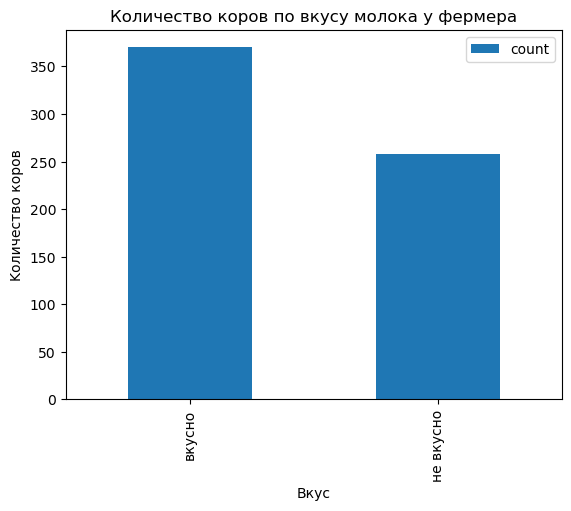

In [56]:
mt.plot(kind='bar')
plt.title('Количество коров по вкусу молока у фермера')
plt.xlabel('Вкус')
plt.ylabel('Kоличество коров');

Коров, дающих вкусное молоко, в 1,4 раза больше чем тех, которые дают невкусное.

### Возраст

Посмотрим на распределение коров по возрастам в двух датасетах.

In [57]:
age1 = ferma_main.pivot_table(index='age',values='id',aggfunc='count')
age1.columns = ['count']
age1

,count
age,
более_2_лет,518
менее_2_лет,110


In [58]:
age2 = cow_buy.pivot_table(index='age',values='breed',aggfunc='count')
age2.columns = ['count']
age2

,count
age,
более_2_лет,15
менее_2_лет,5


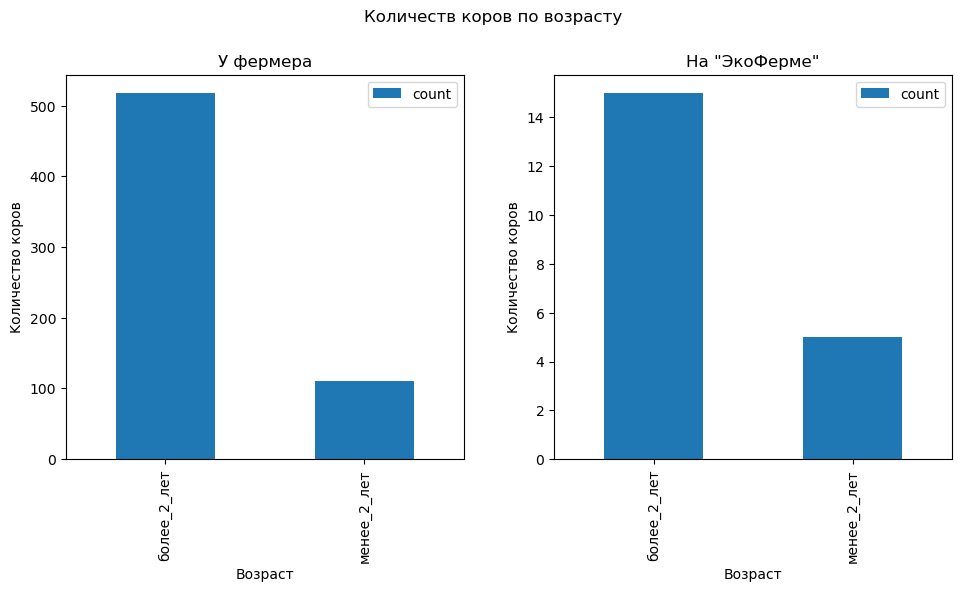

In [59]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2 )
fig. tight_layout ()
fig.set_size_inches(10, 5)

age1.plot(kind='bar',ax=axs[0])
axs[0].set_title('У фермера')

age2.plot(kind='bar',ax=axs[1])
axs[1].set_title('На "ЭкоФерме"')

for i in [0,1]:
    axs[i].set_xlabel('Возраст')
    axs[i].set_ylabel('Kоличество коров')
    
fig.suptitle('Количеств коров по возрасту')
plt.subplots_adjust(top= 0.85 )
plt.show()

У фермера телята составляют примерно 17,5 процентов от всех коров. В небольшой выборке ЭкоФермы телята составляют примерно 30 процентов от всех коров.

### Вывод

1. Большинство коров приносят от 5204 кг до 6750. Некоторые коровы давали до 7222 кг молока.
2. Значения ЭКЕ варьируются от 10,9 до 16,8.
3. В корме фермера содержится от 1660 до 2349 г сырого протеина.
4. Чаще всего количество сахара в корме почти равно количеству пронеина.
5. У фермера коров породы Вис Бик Айдиал больше чем коров породы РефлешнСоверинг в 1,45 раза. В данных с ЭкоФермы коров Вис Бик Айдиал немного меньше чем РефлешнСоверинг.
6. На холмистых пастбищах у фермера пасется в 1,3 раза больше коров чем на равнинных. На ЭкоФерме количество коров на равнинных немного болльше чем на холмистых пастбищах.
7. Количество коров с разными породами папы-быка у фермера примерно одинаковое. На ЭкоФерме быки породы Соверин составляют 60% от всех быков.
8. Жирность молока находится в норме от 3 до 4 %. 
9. Содержание белка в молоке в данных двух таблиц равно примерно 3%.
10. У фермера коров, дающих вкусное молоко, в 1,4 раза больше чем тех, которые дают невкусное.
11. У фермера коровы меньше 2 лет составляют примерно 17,5 процентов от всех коров. В небольшой выборке ЭкоФермы - 25 процентов от всех коров.

<a id='par4'></a> 
## Корреляционный анализ

### Матрица корреляций

Найдем коэффициенты корреляции для всех признаков датасета `ferma_main`.

interval columns not set, guessing: ['milk_yield_kg', 'EFU', 'crude_protein_g', 'SPR', 'fat_content_per', 'protein_per']


<Axes: >

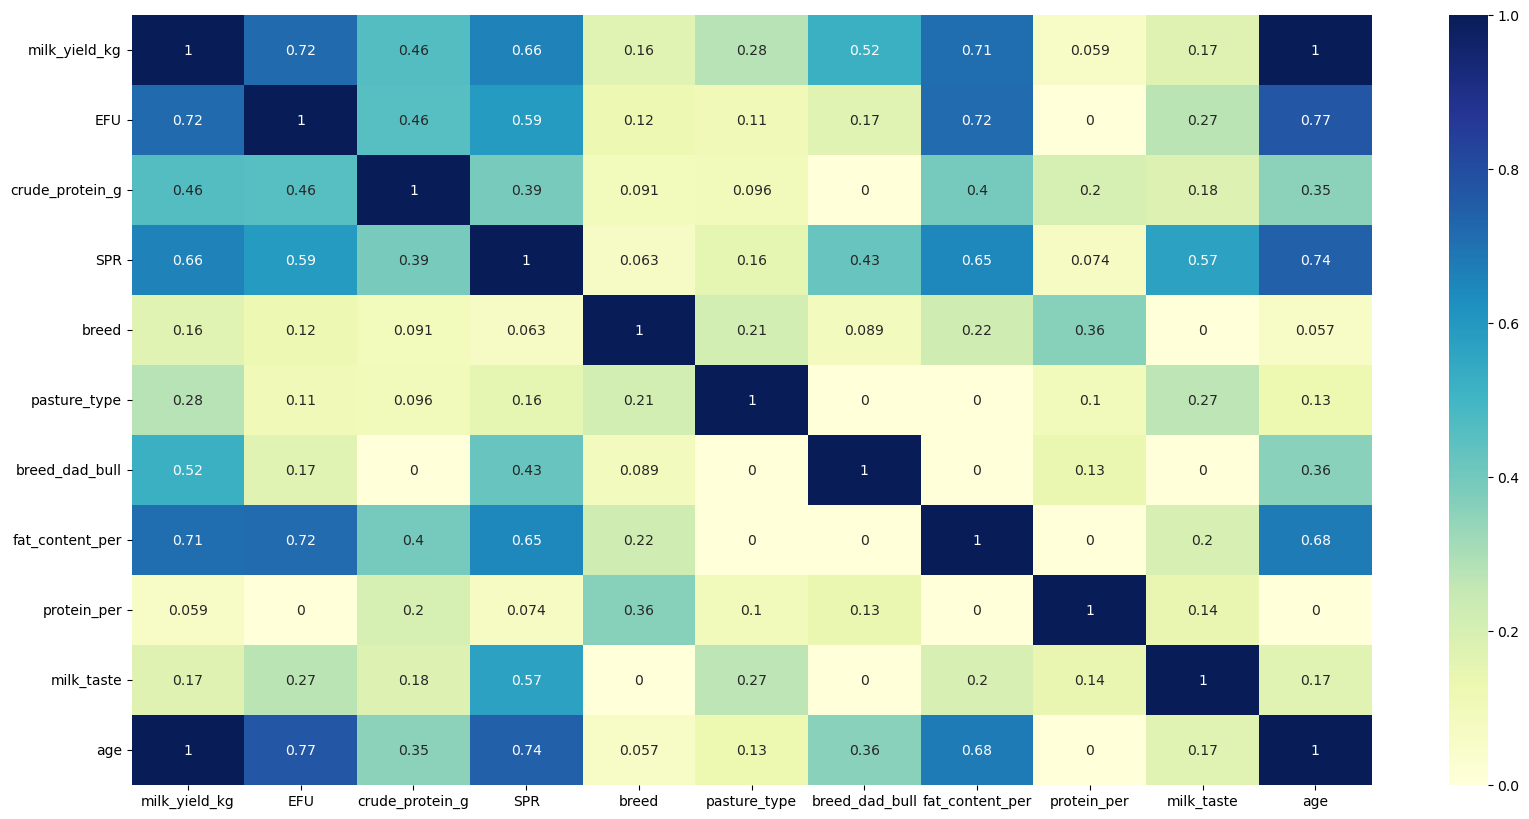

In [60]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(ferma_main.iloc[::,1:].phik_matrix(), annot=True, cmap='YlGnBu') 

### Диаграммы рассеяния

Построим диаграммы рассеяния для признака `milk_yield_kg` и всех количественных признаков с учётом значения категориальных признаков.

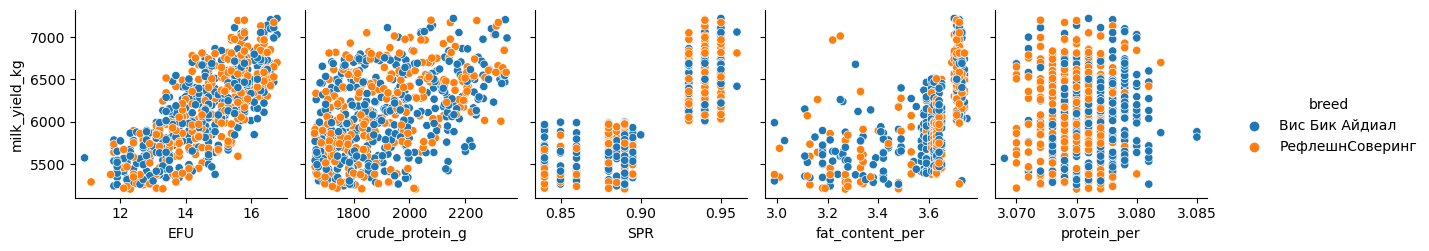

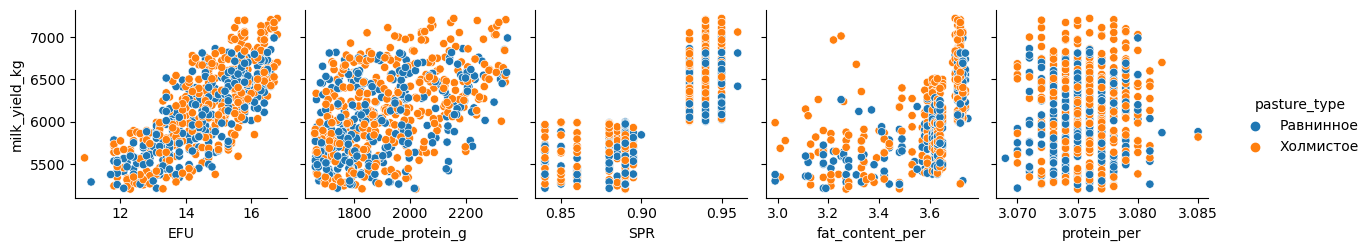

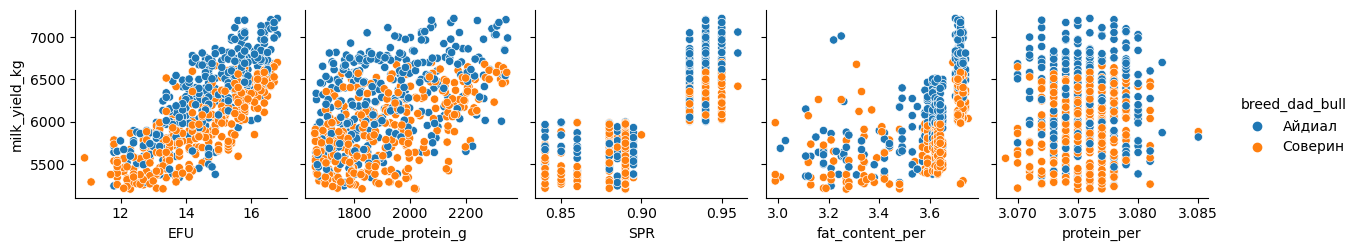

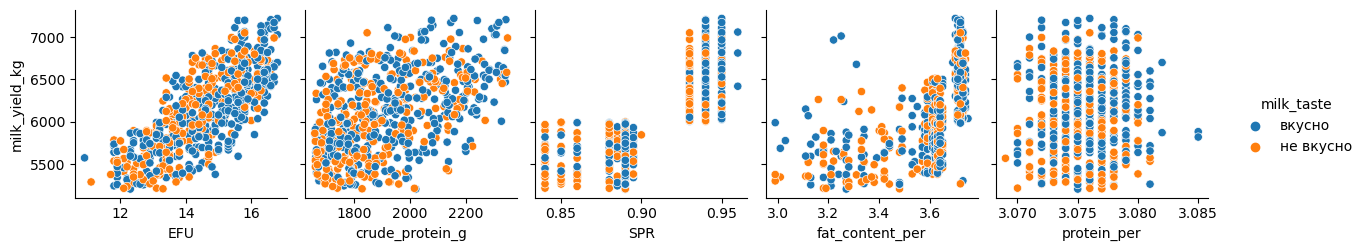

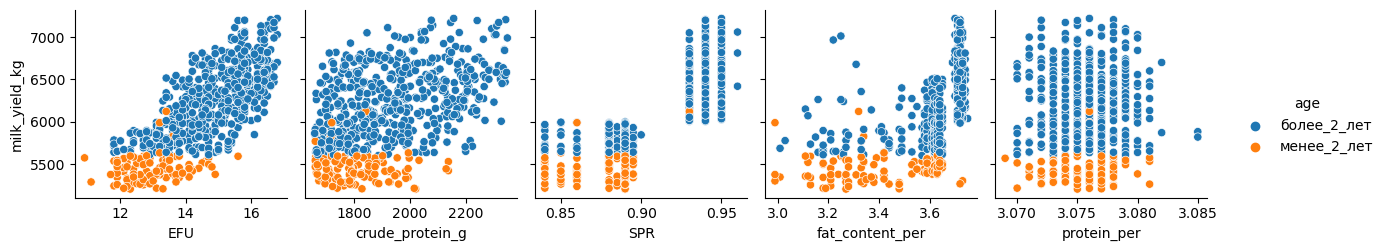

In [61]:
quant_char = ['EFU','crude_protein_g','SPR','fat_content_per','protein_per']
categ_char = ['breed','pasture_type','breed_dad_bull','milk_taste','age']

for c_c in categ_char:
    sns.pairplot(ferma_main,x_vars=quant_char,y_vars=['milk_yield_kg'],hue=c_c)

### Вывод

1. Целевой признак сильно коррелирует с признаком `age`.
2. Целевой признак положительно коррелирует с данными о жирности молока, ЭКЕ и СПО.
3. По диаграммам рассеяния можно заметить, что коровы с породой папы-быка Айдиал дают больше молока чем другие.
4. На графиках также хорошо видно, что почти все коровы меньше двух лет не дают молока больше чем 5600 кг. Из-за этого и возникает большая корреляция.
5. Признак `EFU` связан с целевым нелинейно. Можно заметить квадратичную зависимость.
6. Признак `SPR` также связан нелинейно. В `SPR` отчетливо видны две группы, для которых соответствуют опредеенные значения удоя.

<a id='par5'></a> 
## Обучение модели линейной регрессии

### Подготовка данных и обучение первой модели

Сначала выделим целевой признак в датасете `ferma_main`.

In [62]:
y = ferma_main['milk_yield_kg']

На удой влияют наследственные качества животных, условия содержания и кормление. Поэтому из входных признаков уберем столбцы характеризующие молоко. 

In [63]:
X = ferma_main.drop(['id','milk_taste','milk_yield_kg','fat_content_per','protein_per'], axis=1)
X.head()

,EFU,crude_protein_g,SPR,breed,pasture_type,breed_dad_bull,age
0,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет
1,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет
2,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,более_2_лет
3,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет
4,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет


Закодируем категориальные признаки, используя метод One Hot Encoder.

In [64]:
X = pd.get_dummies(X, drop_first=True) 
X.columns = ['EFU','crude_protein_g','SPR','breed','pasture_type','breed_dad_bull','age']
X.head()

,EFU,crude_protein_g,SPR,breed,pasture_type,breed_dad_bull,age
0,14.2,1743,0.890,0,0,0,0
1,12.8,2138,0.890,0,0,1,1
2,14.0,1854,0.885,1,1,1,0
3,12.4,2012,0.885,1,1,0,0
4,12.8,1675,0.885,0,0,1,1


Разобьем данные на тренировочную и тестовую выборки.

In [65]:
RANDOM_STATE = 42

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X, 
    y, 
    test_size=0.25,
    random_state=RANDOM_STATE
) 

Масштабируем количественные признаки с помощью StandardScaler.

In [66]:
col_num = ['EFU','crude_protein_g','SPR']

scaler = StandardScaler()

X_train_1[col_num] = scaler.fit_transform(X_train_1[col_num])

X_test_1[col_num] = scaler.transform(X_test_1[col_num]) 

In [67]:
X_train_1.head()

,EFU,crude_protein_g,SPR,breed,pasture_type,breed_dad_bull,age
508,1.502378,1.079523,0.837130,1,1,1,0
383,-1.557270,-0.196920,-0.703660,1,1,1,1
587,0.125537,-1.386085,-1.011818,0,0,0,0
197,-0.103937,0.752230,0.837130,0,1,0,0
328,-1.098323,0.828598,-0.703660,0,0,0,0


Построим гистограмму распределения и диаграмму размаха, чтобы проверить правильность выполнения масштабирования

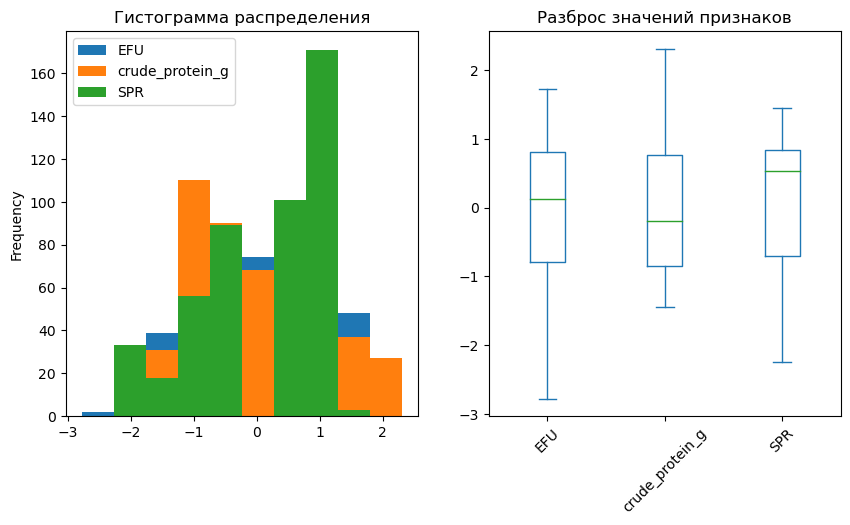

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train_1[col_num].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train_1[col_num].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

Большинство значений находяься в промежутке от -2 до 2. Данные успешно отмасштабированы. Можно приступать к обучению модели.

In [69]:
model  = LinearRegression()

model.fit(X_train_1, y_train_1)

y_pred_1 = model.predict(X_test_1)

Для проверки качества модели рассчитаем коэффициент детерминации. 

In [70]:
r2 = r2_score(y_test_1, y_pred_1)
r2

0.7844078173416967

Проведем анализ остатков.

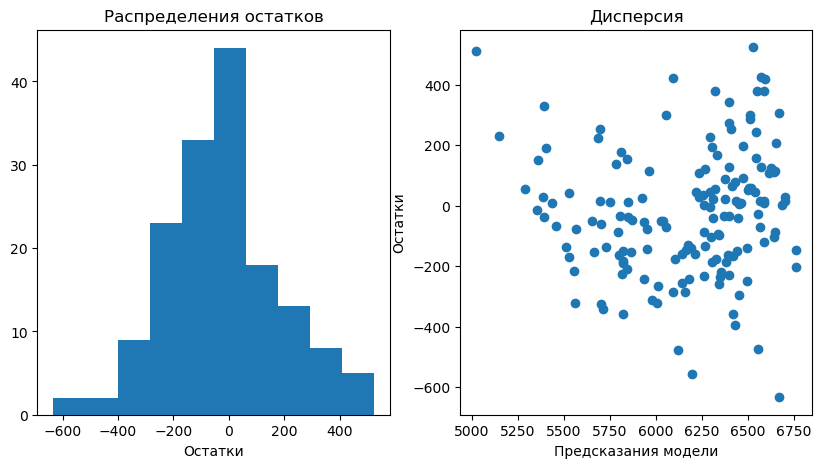

Среднее значение остатков: -25.37


In [71]:
res = y_test_1 - y_pred_1

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(res)
axes[0].set_title('Распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(y_pred_1, res)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Дисперсия')
plt.show()

print('Среднее значение остатков:', round(res.mean(),2))

Среднее значение остатков смещено влево, значит модель часто дает предсказания больше истинных. Остатки распределены не равномерно. На графике можно заметить дугу.

**Вывод:**

Коэффициент детерминации равен 78%. Значит в 78% случаев предсказания модели точнее, чем среднее значение. Анализ остатков показал, что модель часто дает предсказания больше истинных и ее остатки неравномерно распределены. Для улучшения работы модели можно трансформировать данные, чтобы изменить взаимосвязь признаков, также можно добавить новые признаки.


### Подготовка данных и обучение второй модели

Построив диаграммы рассеяния, мы заметили, что некоторые признаки связаны нелинейно с нашим целевым признаком. Исключим эту нелинейность.

Построим еще раз график `milk_yield_kg` от `SPR`.

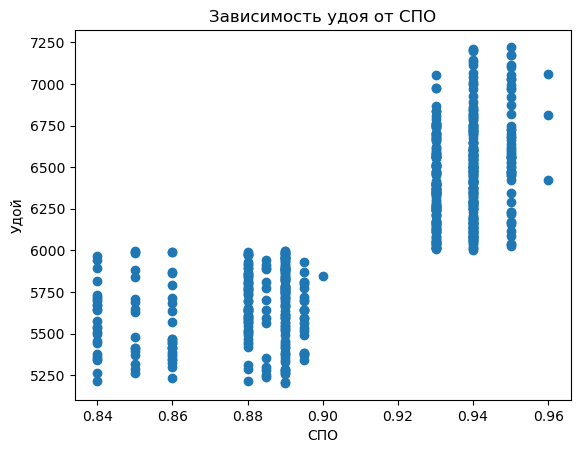

In [72]:
plt.scatter(ferma_main['SPR'], ferma_main['milk_yield_kg'])
plt.ylabel('Удой')
plt.xlabel('СПО')
plt.title('Зависимость удоя от СПО')
plt.show()

На графике видно, что данные разделяются на две группы. Преобразуем СПО в бинарный категориальных признак. Обозначим значения СПО,большие 0.92, как 1, меньшие - 0.

In [73]:
ferma_main_2 = ferma_main.copy()

ferma_main_2['SPR'] = ferma_main['SPR'].apply(lambda x: 1 if x>=0.92 else 0)
ferma_main_2.head()

,id,milk_yield_kg,EFU,crude_protein_g,SPR,breed,pasture_type,breed_dad_bull,fat_content_per,protein_per,milk_taste,age
0,1,5863,14.2,1743,0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


Удой и ЭКЕ тоже связаны нелинейно: между ними наблюдается квадратичная зависимость. Введем новый признак (ЭКЕ в квадрате), чтобы исключить нелинейность.

In [74]:
ferma_main_2['EFU_2'] = ferma_main['EFU']**2
ferma_main_2.head()

,id,milk_yield_kg,EFU,crude_protein_g,SPR,breed,pasture_type,breed_dad_bull,fat_content_per,protein_per,milk_taste,age,EFU_2
0,1,5863,14.2,1743,0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64
1,2,5529,12.8,2138,0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84
2,3,5810,14.0,1854,0,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00
3,4,5895,12.4,2012,0,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76
4,5,5302,12.8,1675,0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84


Выделим целевые и входные признаки, как для первой модели.

In [75]:
y = ferma_main_2['milk_yield_kg']

X = ferma_main_2[['EFU_2','crude_protein_g','SPR','breed','pasture_type','breed_dad_bull','age']]
X.head()

,EFU_2,crude_protein_g,SPR,breed,pasture_type,breed_dad_bull,age
0,201.64,1743,0,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет
1,163.84,2138,0,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет
2,196.00,1854,0,РефлешнСоверинг,Холмистое,Соверин,более_2_лет
3,153.76,2012,0,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет
4,163.84,1675,0,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет


Закодируем категориальные признаки.

In [76]:
X = pd.get_dummies(X, drop_first=True) 
X.columns = ['EFU_2','crude_protein_g','SPR','breed','pasture_type','breed_dad_bull','age']
X.head()

,EFU_2,crude_protein_g,SPR,breed,pasture_type,breed_dad_bull,age
0,201.64,1743,0,0,0,0,0
1,163.84,2138,0,0,0,1,1
2,196.00,1854,0,1,1,1,0
3,153.76,2012,0,1,1,0,0
4,163.84,1675,0,0,0,1,1


Разобьем данные на выборки.

In [77]:
RANDOM_STATE = 42

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X, 
    y, 
    test_size=0.25,
    random_state=RANDOM_STATE
) 

Масштабируем количественные признаки.

In [78]:
col_num = ['EFU_2','crude_protein_g']

scaler = StandardScaler()

X_train_2[col_num] = scaler.fit_transform(X_train_2[col_num])

X_test_2[col_num] = scaler.transform(X_test_2[col_num]) 

X_train_2.head()

,EFU_2,crude_protein_g,SPR,breed,pasture_type,breed_dad_bull,age
508,1.577968,1.079523,1,1,1,1,0
383,-1.511438,-0.196920,0,1,1,1,1
587,0.082269,-1.386085,0,0,0,0,0
197,-0.150235,0.752230,1,0,1,0,0
328,-1.102358,0.828598,0,0,0,0,0


Обучим модель и предскажем значения.

In [79]:
model_2  = LinearRegression()

model_2.fit(X_train_2, y_train_2)

y_pred_2 = model_2.predict(X_test_2)

Рассчитаем коэффициент детерминации.

In [80]:
r2 = r2_score(y_test_2, y_pred_2)
r2

0.8180879926867505

Проведем анализ остатков.

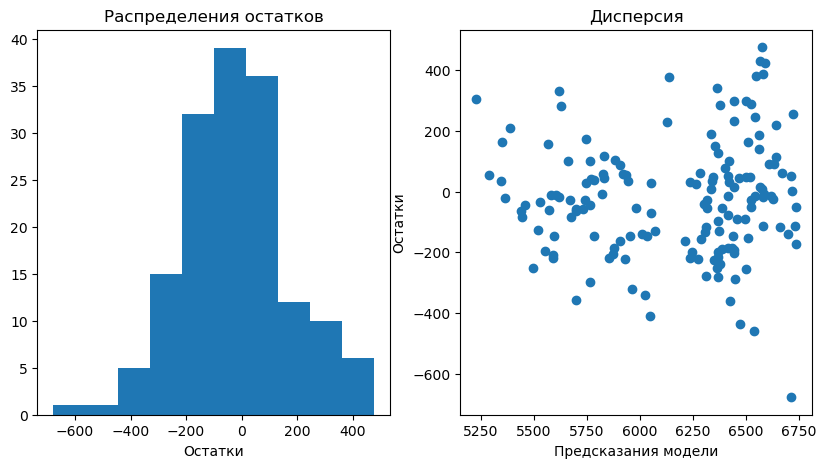

Среднее значение остатков: -24.37


In [81]:
res = y_test_2 - y_pred_2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(res)
axes[0].set_title('Распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(y_pred_2, res)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Дисперсия')
plt.show()

print('Среднее значение остатков:', round(res.mean(),2))

**Вывод:**

Значение коэффициент детерминации - 82%. Это больше чем у предыдущей модели, значит вторая модель работает лучше. Остатки распределены всё еще не равномерно. Среднее значение остатков не значительно изменилось. Модель часто предсказывает значения, большие истинных. Для улучшения качества можно добавить новые признаки.

### Подготовка данных и обучение третьей модели

Добавим в данные новый признак - имя папы-быка.

In [82]:
ferma_main.shape

(628, 12)

In [83]:
ferma_main_3 = ferma_main_2.merge(ferma_dad, how='inner', on='id')
ferma_main_3.shape

(628, 14)

Выделим целевой признак, масштабируем данные и обучим модель.

In [84]:
y = ferma_main_3['milk_yield_kg']

X = ferma_main_3[['EFU_2','crude_protein_g','SPR','breed','breed_dad_bull','pasture_type','dad_name','age']] 
X.head()

,EFU_2,crude_protein_g,SPR,breed,breed_dad_bull,pasture_type,dad_name,age
0,201.64,1743,0,Вис Бик Айдиал,Айдиал,Равнинное,Буйный,более_2_лет
1,163.84,2138,0,Вис Бик Айдиал,Соверин,Равнинное,Соловчик,менее_2_лет
2,196.00,1854,0,РефлешнСоверинг,Соверин,Холмистое,Барин,более_2_лет
3,153.76,2012,0,РефлешнСоверинг,Айдиал,Холмистое,Буйный,более_2_лет
4,163.84,1675,0,Вис Бик Айдиал,Соверин,Равнинное,Барин,менее_2_лет


In [85]:
X = pd.get_dummies(X, drop_first=True) 

X.head()

,EFU_2,crude_protein_g,SPR,breed_РефлешнСоверинг,breed_dad_bull_Соверин,pasture_type_Холмистое,dad_name_Буйный,dad_name_Геркулес,dad_name_Соловчик,age_менее_2_лет
0,201.64,1743,0,0,0,0,1,0,0,0
1,163.84,2138,0,0,1,0,0,0,1,1
2,196.00,1854,0,1,1,1,0,0,0,0
3,153.76,2012,0,1,0,1,1,0,0,0
4,163.84,1675,0,0,1,0,0,0,0,1


In [86]:
RANDOM_STATE = 42

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    X, 
    y, 
    test_size=0.25,
    random_state=RANDOM_STATE
) 

In [87]:
col_num = ['EFU_2','crude_protein_g']

scaler = StandardScaler()

X_train_3[col_num] = scaler.fit_transform(X_train_3[col_num])

X_test_3[col_num] = scaler.transform(X_test_3[col_num]) 

X_train_3.head()

,EFU_2,crude_protein_g,SPR,breed_РефлешнСоверинг,breed_dad_bull_Соверин,pasture_type_Холмистое,dad_name_Буйный,dad_name_Геркулес,dad_name_Соловчик,age_менее_2_лет
507,1.577968,1.079523,1,1,1,1,0,0,1,0
382,-1.511438,-0.196920,0,1,1,1,0,0,0,1
586,0.082269,-1.386085,0,0,0,0,1,0,0,0
196,-0.150235,0.752230,1,0,0,1,1,0,0,0
327,-1.102358,0.828598,0,0,0,0,0,1,0,0


In [88]:
model_3  = LinearRegression()

model_3.fit(X_train_3, y_train_3)

y_pred_3 = model_3.predict(X_test_3)

Посчитаем метрику и посмотрим на распределение остатков.

In [89]:
r2 = r2_score(y_test_3, y_pred_3)
r2

0.8247542745210407

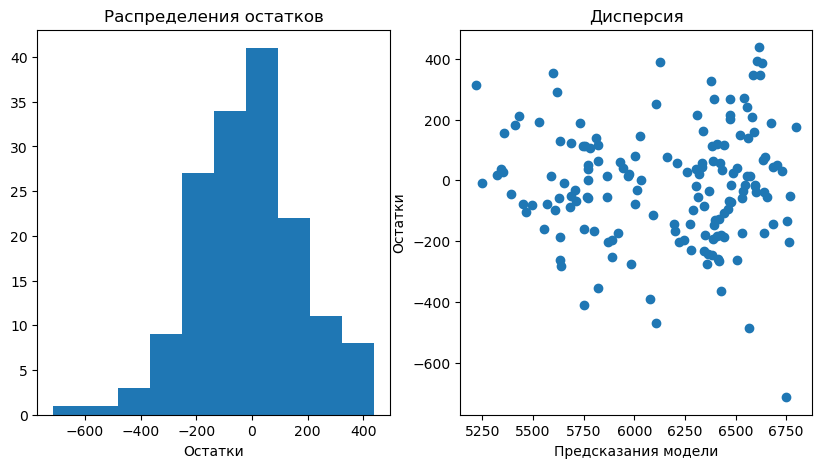

Среднее значение остатков: -15.2


In [90]:
res = y_test_3 - y_pred_3

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(res)
axes[0].set_title('Распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(y_pred_3, res)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Дисперсия')
plt.show()

print('Среднее значение остатков:', round(res.mean(),2))

**Вывод:**

Коэффициент детерминации равен 82%. Среднее значение остатков смещено меньше от нуля чем у других моделей.

### Оценка качества работы моделей

Сравнив коэффициент детерминации и остатки, можно сказать, что лучше всего работает вторая модель. Посмотрим на значения других метрик.

In [91]:
print('MSE первой модели', mean_squared_error(y_test_1, y_pred_1)) 
print('MSE второй модели', mean_squared_error(y_test_2, y_pred_2)) 
print('MSE третьей модели', mean_squared_error(y_test_3, y_pred_3)) 

MSE первой модели 43887.015009660514
MSE второй модели 37030.91131113689
MSE третьей модели 35673.88988618193


In [92]:
print('RMSE первой модели', mean_squared_error(y_test_1, y_pred_1, squared=False)) 
print('RMSE второй модели', mean_squared_error(y_test_2, y_pred_2, squared=False)) 
print('RMSE третьей модели', mean_squared_error(y_test_3, y_pred_3, squared=False)) 

RMSE первой модели 209.4922791170608
RMSE второй модели 192.43417396901438
RMSE третьей модели 188.87532895055915


In [93]:
print('MAE первой модели', mean_absolute_error(y_test_1, y_pred_1)) 
print('MAE второй модели', mean_absolute_error(y_test_2, y_pred_2)) 
print('MAE третьей модели', mean_absolute_error(y_test_3, y_pred_3)) 

MAE первой модели 164.2419446347493
MAE второй модели 149.03965222364593
MAE третьей модели 146.16302445362317


Меньше всего значения ошибок у третьей модели. В среднем она предсказывает значения с ошибкой в 146. Рассчитаем доверительный интервал для прогноза этой модели.

In [94]:
st.norm.interval(confidence=0.95, loc=y_pred_3.mean(), scale=st.sem(y_pred_3))

(6092.340075854289, 6221.375070058381)

С вероятность 95% среднее предсказанное значение удоя коровы будет лежать в интервале от 6092 до 6221.

### Прогнозирование удоя коров с ЭкоФермы

Добавим недостающие признаки в датасет `cow_buy`. Заполним `EFU`, `crude_protein_g` и `SPR` средними значениями из `ferma_main`, увеличенными на 5%.

In [95]:
cow_buy['EFU'] = ferma_main['EFU'].mean() * 1.05
cow_buy['crude_protein_g'] = ferma_main['crude_protein_g'].mean() * 1.05
cow_buy['SPR'] = ferma_main['SPR'].mean() * 1.05

cow_buy.head()

,breed,pasture_type,breed_dad_bull,dad_name,cur_fat_content_per,cur_protein_per,age,EFU,crude_protein_g,SPR
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744


Подготовим данные как и раньше.

In [96]:
cow_buy['SPR'] = cow_buy['SPR'].apply(lambda x: 1 if x>=0.92 else 0)
cow_buy['EFU_2'] = cow_buy['EFU']**2

cow_buy.head()

,breed,pasture_type,breed_dad_bull,dad_name,cur_fat_content_per,cur_protein_per,age,EFU,crude_protein_g,SPR,EFU_2
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,1,233.361138
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,1,233.361138
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,1,233.361138
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,1,233.361138
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,1,233.361138


In [97]:
X = cow_buy[['EFU_2','crude_protein_g','SPR','breed','breed_dad_bull','pasture_type','dad_name','age']]
X.head()

,EFU_2,crude_protein_g,SPR,breed,breed_dad_bull,pasture_type,dad_name,age
0,233.361138,2019.947532,1,Вис Бик Айдиал,Айдиал,Холмистое,Геркулес,более_2_лет
1,233.361138,2019.947532,1,Вис Бик Айдиал,Соверин,Равнинное,Буйный,менее_2_лет
2,233.361138,2019.947532,1,РефлешнСоверинг,Соверин,Равнинное,Барин,более_2_лет
3,233.361138,2019.947532,1,РефлешнСоверинг,Айдиал,Холмистое,Буйный,более_2_лет
4,233.361138,2019.947532,1,РефлешнСоверинг,Айдиал,Равнинное,Буйный,более_2_лет


In [98]:
X = pd.get_dummies(X, drop_first=True) 

X.head()

,EFU_2,crude_protein_g,SPR,breed_РефлешнСоверинг,breed_dad_bull_Соверин,pasture_type_Холмистое,dad_name_Буйный,dad_name_Геркулес,dad_name_Соловчик,age_менее_2_лет
0,233.361138,2019.947532,1,0,0,1,0,1,0,0
1,233.361138,2019.947532,1,0,1,0,1,0,0,1
2,233.361138,2019.947532,1,1,1,0,0,0,0,0
3,233.361138,2019.947532,1,1,0,1,1,0,0,0
4,233.361138,2019.947532,1,1,0,0,1,0,0,0


In [99]:
col_num = ['EFU_2','crude_protein_g']

scaler = StandardScaler()

X[col_num] = scaler.fit_transform(X[col_num])

X.head()

,EFU_2,crude_protein_g,SPR,breed_РефлешнСоверинг,breed_dad_bull_Соверин,pasture_type_Холмистое,dad_name_Буйный,dad_name_Геркулес,dad_name_Соловчик,age_менее_2_лет
0,0.0,4.547474e-13,1,0,0,1,0,1,0,0
1,0.0,4.547474e-13,1,0,1,0,1,0,0,1
2,0.0,4.547474e-13,1,1,1,0,0,0,0,0
3,0.0,4.547474e-13,1,1,0,1,1,0,0,0
4,0.0,4.547474e-13,1,1,0,0,1,0,0,0


Предскажем значения.

In [100]:
y_pred_r = model_3.predict(X)
y_pred_r

array([6494.94259089, 6263.73432244, 6169.02306941, 6478.11267062,
       6427.16936041, 6310.40351167, 6494.94259089, 6456.2830312 ,
       6169.02306941, 6285.56396187, 6229.73115384, 6502.95222043,
       6494.94259089, 6012.49803639, 6169.02306941, 6478.11267062,
       6229.73115384, 6310.40351167, 6456.2830312 , 6427.16936041])

In [101]:
cow_buy['milk_yield_kg'] = y_pred_r
cow_buy.head()

,breed,pasture_type,breed_dad_bull,dad_name,cur_fat_content_per,cur_protein_per,age,EFU,crude_protein_g,SPR,EFU_2,milk_yield_kg
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,1,233.361138,6494.942591
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,1,233.361138,6263.734322
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,1,233.361138,6169.023069
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,1,233.361138,6478.112671
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,1,233.361138,6427.169360


По результатам модели все коровы ЭкоФермы дают за год больше 6000 кг молока.

### Вывод

Мы обучили три модели линейной регресси, каждый раз модифицируя данные. Лучше всего предсказывает модель, в которой исключена нелинейность между удоем и признаками `EFU`, `SPR` и добавлены данные об имени папы-быка. Значение $R^2$ этой модели равно 82%, MAE - 146. 

На данных ЭкоФермы модель предсказала, что у всех коров в год удой больше 6000 кг.

<a id='par6'></a> 
## Обучение модели логистической регрессии

### Подготовка данных и обучение модели

Добавим значение `EFU` в квадрате и переведем `SPR` в категориальный признак.

In [102]:
ferma_main_c = ferma_main.copy()

ferma_main_c['SPR'] = ferma_main['SPR'].apply(lambda x: 1 if x>=0.92 else 0)

ferma_main_c['EFU_2'] = ferma_main['EFU']**2
ferma_main_c.head()

,id,milk_yield_kg,EFU,crude_protein_g,SPR,breed,pasture_type,breed_dad_bull,fat_content_per,protein_per,milk_taste,age,EFU_2
0,1,5863,14.2,1743,0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64
1,2,5529,12.8,2138,0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84
2,3,5810,14.0,1854,0,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00
3,4,5895,12.4,2012,0,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76
4,5,5302,12.8,1675,0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84


Мы не удаляли ранее выбросы в признаке `fat_content_per`, но для лучшей работы модели классификации их стоит удалить.

In [103]:
ferma_main_c = ferma_main_c.loc[ferma_main_c['fat_content_per']>=3.4]

Закодируем категориальные признаки.

In [104]:
ferma_main_c['milk_taste'] = ferma_main_c['milk_taste'].apply(lambda x: 1 if x == 'вкусно' else 0)

In [105]:
ferma_main_c = ferma_main_c.drop(['id','EFU','breed_dad_bull'], axis=1)

ferma_main_c = pd.get_dummies(ferma_main_c, drop_first=True) 
ferma_main_c.columns = ['milk_yield_kg','crude_protein_g','SPR','fat_content_per',
            'protein_per','milk_taste','EFU_2','breed','pasture_type','age']

ferma_main_c.head()

,milk_yield_kg,crude_protein_g,SPR,fat_content_per,protein_per,milk_taste,EFU_2,breed,pasture_type,age
0,5863,1743,0,3.58,3.076,1,201.64,0,0,0
1,5529,2138,0,3.54,3.079,1,163.84,0,0,1
2,5810,1854,0,3.59,3.074,0,196.00,1,1,0
3,5895,2012,0,3.40,3.075,0,153.76,1,1,0
4,5302,1675,0,3.73,3.073,1,163.84,0,0,1


Выделим целевой и входные признаки.

In [106]:
y = ferma_main_c['milk_taste']

X = ferma_main_c.drop(['milk_taste'], axis=1)
X.head()

,milk_yield_kg,crude_protein_g,SPR,fat_content_per,protein_per,EFU_2,breed,pasture_type,age
0,5863,1743,0,3.58,3.076,201.64,0,0,0
1,5529,2138,0,3.54,3.079,163.84,0,0,1
2,5810,1854,0,3.59,3.074,196.00,1,1,0
3,5895,2012,0,3.40,3.075,153.76,1,1,0
4,5302,1675,0,3.73,3.073,163.84,0,0,1


Разделим на выборки.

In [107]:
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.25,
    random_state=RANDOM_STATE
) 

Масштабируем количественные признаки.

In [108]:
col_num = ['EFU_2','crude_protein_g','fat_content_per','protein_per','milk_yield_kg']

scaler = StandardScaler()

X_train[col_num] = scaler.fit_transform(X_train[col_num])

X_test[col_num] = scaler.transform(X_test[col_num]) 

X_train.head()

,milk_yield_kg,crude_protein_g,SPR,fat_content_per,protein_per,EFU_2,breed,pasture_type,age
415,-0.281720,1.200802,1,0.762076,0.929475,-0.250383,0,1,0
371,0.911452,-0.671811,1,0.762076,-1.015715,0.527125,1,0,0
551,-1.784981,-0.726566,0,-0.440786,0.151399,-0.742719,1,1,1
235,0.637315,2.235667,1,0.895728,2.096590,1.732826,0,1,0
460,-0.230038,1.239130,1,0.762076,-0.237639,-0.081649,0,0,0


Обучим модель.

In [109]:
clf = LogisticRegression()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test) 

Посчитаем accuracy и построим матрицу ошибок.

In [110]:
acc = accuracy_score(y_test, y_pred)
acc

0.6911764705882353

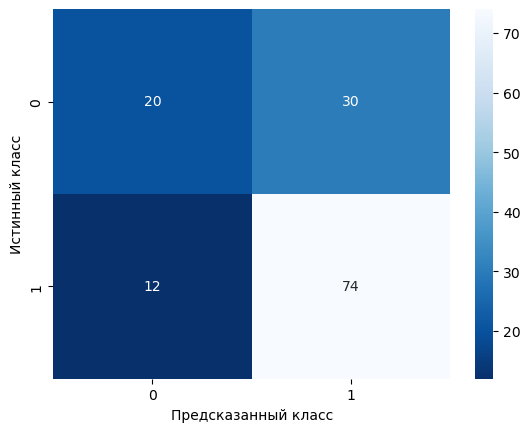

In [111]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс'); 

Точность модели 69%. Модель хорошо предсказывает, что молоко вкусное, когда оно действительно вскусное, и часто совершает ложноположительные ошибки. Проанализируем другие метрики и попробуем улучшить модель.

### Анализ модели

Заказчику важно вкусное молоко, поэтому следует не допустить пропуска коров с невкусным молоком. Важнеее ошибка первого рода. 

Посчитаем значения метрик recall и precision.

In [112]:
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print('recall:',recall,'\nprecision',precision)

recall: 0.8604651162790697 
precision 0.7115384615384616


Значение precision достаточно низкое. Попробуем изменить порог принадлежности к классам, чтобы свести ошибку первого рода к нулю.

In [113]:
def df_treshold(tresholds, X_test, y_test):
    
    y_proba = clf.predict_proba(X_test)[:,1]

    data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba'])
    
    df = pd.DataFrame()
    df['treshold'] = [str(x) for x in tresholds]
    pr = []
    rec = []
    tp = []
    fp = []
    ac = []
    for i in thresholds:
        data[str(i)] = data['y_proba'].apply(lambda x:  0 if x < i else 1 )
        pr.append(precision_score(y_test, data[str(i)],zero_division=0))
        rec.append(recall_score(y_test, data[str(i)],zero_division=0))
        tp.append(confusion_matrix(y_test, data[str(i)])[1,1])
        fp.append(confusion_matrix(y_test, data[str(i)])[0,1])
        ac.append(accuracy_score(y_test, data[str(i)]))
        
    df['precision'] = pr
    df['recall'] = rec
    df['accuracy'] = ac
    df['TP'] = tp
    df['FP'] = fp
    return df

In [114]:
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 4,endpoint=False)]

df_treshold(thresholds,X_test,y_test)

,treshold,precision,recall,accuracy,TP,FP
0,0.1,0.632353,1.000000,0.632353,86,50
1,0.32,0.628788,0.965116,0.617647,83,49
2,0.55,0.744444,0.779070,0.691176,67,23
3,0.78,0.894737,0.197674,0.477941,17,2


In [115]:
thresholds = [round(i,2) for i in np.linspace(0.78,1,num = 4,endpoint=False)]

df_treshold(thresholds,X_test,y_test)

,treshold,precision,recall,accuracy,TP,FP
0,0.78,0.894737,0.197674,0.477941,17,2
1,0.84,1.000000,0.023256,0.382353,2,0
2,0.89,0.000000,0.000000,0.367647,0,0
3,0.94,0.000000,0.000000,0.367647,0,0


При значении порога 0.84 модель не предсказывает вкусное молоко у коров с невкусным. Однако точность такой модели очень низкая. Попробуем найти порог, при котором достаточно высокое значение precision и accuracy не меньше 60%.

In [116]:
thresholds = [round(i,2) for i in np.linspace(0.55,0.75,num = 6,endpoint=False)]

df_treshold(thresholds,X_test,y_test)

,treshold,precision,recall,accuracy,TP,FP
0,0.55,0.744444,0.779070,0.691176,67,23
1,0.58,0.759036,0.732558,0.683824,63,20
2,0.62,0.815385,0.616279,0.669118,53,12
3,0.65,0.830508,0.569767,0.654412,49,10
4,0.68,0.830189,0.511628,0.625000,44,9
5,0.72,0.852941,0.337209,0.544118,29,5


При значении порога 0.65 precisoin равно 0.83, а recall 0.02. Значение recall для нас неважно. Accuracy равно 65%. Далее предскажем вкус молока коров с ЭкоФермы, используя порог классификации равный 0.65.

### Предсказание вкуса молока коров  с ЭкоФермы

Подготовим данные и предскажем вкус молока на данных `cow_buy`, используя порог классификации 0.65.

In [117]:
cow_buy_c = cow_buy.drop(['dad_name','breed_dad_bull'], axis=1)
X = pd.get_dummies(cow_buy_c, drop_first=True) 
X.columns = ['cur_fat_content_per','cur_protein_per','EFU','crude_protein_g','SPR','EFU_2','milk_yield_kg',
             'breed','pasture_type','age']
X.head()

,cur_fat_content_per,cur_protein_per,EFU,crude_protein_g,SPR,EFU_2,milk_yield_kg,breed,pasture_type,age
0,3.58,3.076,15.276162,2019.947532,1,233.361138,6494.942591,0,1,0
1,3.54,3.081,15.276162,2019.947532,1,233.361138,6263.734322,0,0,1
2,3.59,3.074,15.276162,2019.947532,1,233.361138,6169.023069,1,0,0
3,3.40,3.061,15.276162,2019.947532,1,233.361138,6478.112671,1,1,0
4,3.64,3.074,15.276162,2019.947532,1,233.361138,6427.169360,1,0,0


In [118]:
X = X[['milk_yield_kg','crude_protein_g','SPR','cur_fat_content_per','cur_protein_per','EFU_2',
       'breed','pasture_type','age']]

In [121]:
X.columns = ['milk_yield_kg','crude_protein_g','SPR','fat_content_per','protein_per','EFU_2',
       'breed','pasture_type','age']
col_num = ['milk_yield_kg','EFU_2','crude_protein_g','fat_content_per','protein_per']

scaler = StandardScaler()

X[col_num] = scaler.fit_transform(X[col_num])

X.head()

,milk_yield_kg,crude_protein_g,SPR,fat_content_per,protein_per,EFU_2,breed,pasture_type,age
0,1.063024,0.0,1,0.020225,0.645020,0.0,0,1,0
1,-0.554584,0.0,1,-0.303380,1.141190,0.0,0,0,1
2,-1.217215,0.0,1,0.101127,0.446553,0.0,1,0,0
3,0.945276,0.0,1,-1.436000,-0.843488,0.0,1,1,0
4,0.588860,0.0,1,0.505634,0.446553,0.0,1,0,0


In [122]:
y_pred_c = (clf.predict_proba(X)[:,1]>=0.65).astype(int)
y_pred_c

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0])

Занесем данные о вкусу молока в датасет.

In [123]:
cow_buy['milk_taste'] = y_pred_c
cow_buy.head()

,breed,pasture_type,breed_dad_bull,dad_name,cur_fat_content_per,cur_protein_per,age,EFU,crude_protein_g,SPR,EFU_2,milk_yield_kg,milk_taste
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,1,233.361138,6494.942591,0
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,1,233.361138,6263.734322,0
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,1,233.361138,6169.023069,0
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,1,233.361138,6478.112671,0
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,1,233.361138,6427.169360,0


### Вывод

Мы обучили модель логистической регрессии. Ее точность была 69%, однако модель допускала много ошибок первого рода. Сведя значение precision к минимому, при котором значение accuracy не опускается слишком низко, нашли подходящий порог классификации.
Он равер 0.65. Предсказав с этим порогом вкус молока на Экоферме, получили, что у трех коров вкусное молоко.

<a id='par7'></a> 
## Итоговые выводы

Отберем коров, которые подходят фермеру (удой больше 6000 кг, вкусное молоко)

In [124]:
cow_buy.loc[(cow_buy['milk_yield_kg']>=6000)&(cow_buy['milk_taste']==1)]

,breed,pasture_type,breed_dad_bull,dad_name,cur_fat_content_per,cur_protein_per,age,EFU,crude_protein_g,SPR,EFU_2,milk_yield_kg,milk_taste
10,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.276162,2019.947532,1,233.361138,6229.731154,1
13,Вис Бик Айдиал,Холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,15.276162,2019.947532,1,233.361138,6012.498036,1
16,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.276162,2019.947532,1,233.361138,6229.731154,1


**Сформулируем общий вывод по работе:**

1. При предобработке мы изменили типы данных в столбцах `EFU`, `SPR`, `fat_content_per`, `protein_per` в датасете `ferma_main` и
в столбцах `cur_fat_content_per`, `cur_protein_per` датасета ЭкоФермы. Удалили явные дубликаты в данных фермера.
2. Мы провели исследовательский и корреляционный анализ данных. По последнему мы заметили следующее:
    - Удой положительно коррелирует с данными о жирности молока, ЭКЕ и СПО.
    - Почти все коровы меньше двух лет не дают молока больше чем 5600 кг.
    - Признак `EFU` связан с целевым нелинейно. Можно заметить квадратичную зависимость.
    - Признак `SPR` также связан нелинейно. В `SPR` отчетливо видны две группы, для которых соответствуют опредеенные значения удоя.
3. Мы обучили три модели линейной регресси, каждый раз модифицируя данные.
    - Для первой модели мы только лишь отобрали подходящие данные, никак их не преобразовывая. Мы не использовали данные о характеристиках молока, так как они не влияют на удой. Коэффициент детерминации этой модели равен 78%, а `RMSE` - 209.
    - Для второй модели мы устранили нелинейность в данных в признаках `EFU` и `SPR`. $R^2$ равен 82%, `RMSE` - 192.
    - Для третьей модели мы добавили данные об имени папы-быка, модель стала работать лучше. $R^2$ равен 82%, `RMSE` - 188.
4. Для предсказания удоя коров с ЭкоФермы мы выбрали третью модель, так как по значениям всех метрик она была лучшей. Качество модели можно было еще улучшить, если задать признаку `age` больший вес чем у остальных признаков. По диаграммам рассеяния видно, что коровы меньше 2 лет очень редко дают молоко больше 6000 кг.
5. Мы обучили модель логистической регрессии. При обучении не учитывали данные о породе папы-быка, так как они плохо сказывались на точности модели. `Accuracy` получилось равное 69%.
6. Для фермера важно, чтобы молоко было вкусным, поэтому следовало минимизировать ошибку первого рода. Мы использовали метрики `precision` и `recall`. Они важны при анализе рисков, потому что часто нужно, чтобы модель не давала ложно-положительные или ложно-отрицательные результаты. Главное понимать какое значение метрики: `precision` или `recall` - должно быть большим в определенных случаях. 
    Чтобы минимизировать FP мы изменили порог классификации. Был выбран порог - 0.65. При нем значение `precision` равно 0.83, а `accuracy` - 0.65.
7. Мы предсказали вкус коров на данных ЭкоФермы, используя порог классификации 0.65. Модель предсказала, что у трех коров вкусное молоко.

В итоге, условиям фермера удовлетворяют три коровы с ЭкоФермы. Мы постарались исключить ложноположительные ошибки при определении вкуса молока, так что у этих трех коров почти точно вкусное молоко, и риски ошибиться минимальные.